
# Project: TMDb Movie Data Analysis and Insights Report 🎬

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Project Scope**: In this analysis, we will be analyzing data associate with the TMDb movie information. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. In particular, we will find trends among some specific categories. In this report, we would like to explore what kinds of properties are associated with movies that have high profit. Could it be popularity? Or genres and voting scores? Let's explore!

In [1]:
## First thing first, import the libraries we will be using later

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 14})

By checking the columns in the data set, we notice immediately that some of the columns are not relevant to our study. First, we will list all of the columns and their contents.  

🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿🍿

0. id: id of the movie

1. imdb_id: id of the movie in imdb system

2. popularity: popularity of the movie

3. budget: budget of the movie subject to the dollar value when the movie was released

4. revenue: revenue of the movie subject to the dollar value when the movie was released

5. original_title: original_title

6. cast: cast of the movie, contain multiple values separated by pipe (|) charactor

7. homepage: website

8. director: movie director

9. tagline: a sentence to highlight the movie

10. keywords

11. overview: intro of the movie

12. runtime: runtime

13. genres: type of the movie, contain multiple values separated by pipe (|) charactor4

14. production_companies: producers of the movie, contain multiple values separated by pipe (|) charactor

15. release_date: release_date of the movie

16. vote_count: number of audience who rated this movie	

17. vote_average: average rating of this movie

18. release_year: release_date of the movie

19. budget_adj: budget of the associated movie in terms of 2010 dollars, accounting for inflation over time.	

20. revenue_adj: revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

<a id='wrangling'></a>
## Data Wrangling

> **This Section**: In this section of the report, we will load in the data, check for cleanliness, and then trim and clean your dataset for further analysis.

### General Properties

1. **Load the data**

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


2. **Check the shape of the data set. There are total 10866 rows and 21 columns.** 

In [3]:
df.shape

(10866, 21)

3. **Check the statistics of the data set.**

Here, we can get a broad observation of the data. For example, we can conclude that 50% of the movie did not make any revenue, and the film with the highest revenue made 2.8 billion dollars (2010 dollar value). The max voter count is 9767, which means there are 9767 viewers rated this movie. The average number is 217 views.

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


4. **Implementing the info( ) method to check the data type of each column. Also, we can see that there are some missing data in multiple columns, such as cast, homepage, director, taglines, etc. We need to consider that when we clean the data set.** 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning 

> After discussing the structure of the data and any problems that need to be cleaned, perform those cleaning steps in the second part of this section.


1. **Drop irrelevant columns.**

Since our question is to investigate the properties that are associated with the profits of the movie, some categories such as the homepage will not be relevant to our study. As such, we will drop some columns that are not relevant to the study at all.

In [6]:
df.drop(['homepage', 'tagline', 'keywords', 'overview', 'release_date', 'production_companies'], axis = 1, inplace = True)

In [7]:
## Confirm if those irrelevant columns has been dropped inplace
df.shape

(10866, 15)

2. **Uniform the dollar value $$$ in revenue and budget columns**

As we read through the data set, we noticed that there are two similar sets: budget/revenues vs. budget_adj/revenue_adj. The differences between those two sets are inflation adjustment. Budget_adj/revenue_adj are associated movies in terms of 2010 dollars accounting for inflation over time, while the former set is dollar values in the year when the film was released. To make a fair analysis, we will be using budget_adj/revenue_adj set to achieve an apple-to-apple comparison.

In [8]:
df.drop(['budget', 'revenue'], axis = 1, inplace = True)

In [9]:
df.shape

(10866, 13)

3. **Drop rows with missing values**

In [10]:
df.isnull().sum()

id                 0
imdb_id           10
popularity         0
original_title     0
cast              76
director          44
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [11]:
## drop rows with any missing value in data set
df.dropna(inplace=True)

In [12]:
## check id it has been cleared
df.isnull().sum().any()

False

4. **Drop the duplicated data**

In [13]:
## print the number of duplicates in the data set
print(df.duplicated().sum())

1


In [14]:
## drop duplicates
df.drop_duplicates(inplace = True)

In [15]:
## print number of duplicates again to confirm
print(df.duplicated().sum())

0


In [16]:
## check the data set as of now 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10726 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10726 non-null  int64  
 1   imdb_id         10726 non-null  object 
 2   popularity      10726 non-null  float64
 3   original_title  10726 non-null  object 
 4   cast            10726 non-null  object 
 5   director        10726 non-null  object 
 6   runtime         10726 non-null  int64  
 7   genres          10726 non-null  object 
 8   vote_count      10726 non-null  int64  
 9   vote_average    10726 non-null  float64
 10  release_year    10726 non-null  int64  
 11  budget_adj      10726 non-null  float64
 12  revenue_adj     10726 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 1.1+ MB


5. **Calculate the Profits of each movie**

In [17]:
## crear an array with profit_adj information

profit_adj = df['revenue_adj'] - df['budget_adj']

In [18]:
## append the array to the data set

df['profit_adj'] = profit_adj

6. **Split the genres column and associate each genres with its profit**

As we inspect the data, we noticed that one movie could have more than one genres types. For instance, Jurrasic World has the genres as "Action|Adventure|Science Fiction|Thriller". To better analyzed the genres, which could be a critical factor associated with profits, we splited the genres column and associate them with the according id and profits, then saved in another file for further analysis. 

In [19]:
## first create three empty columns

imdb_id = []
genres = []
profits = []

## the outer for loop iterate each row of the entire data set
## the innner loop append relevant 3 columns in each row 

for i in np.arange(0, df.shape[0]):
    temp = df.iloc[i, :]
    for genre in temp['genres'].split('|'):
        imdb_id.append(temp['imdb_id'])
        genres.append(genre)
        profits.append(temp['profit_adj'])

In [20]:
## save it to the new data frame
df_genres = pd.DataFrame.from_dict({
    'id': imdb_id,
    'genre': genres,
    'profit': profits
})

In [21]:
## save the file and upload it for further analysis 
df_genres.to_csv('/Users/Lei/Desktop/genres_profit.csv', index=False)

In [22]:
df_genres.head()

,id,genre,profit
0,tt0369610,Action,1.254446e+09
1,tt0369610,Adventure,1.254446e+09
2,tt0369610,Science Fiction,1.254446e+09
3,tt0369610,Thriller,1.254446e+09
4,tt1392190,Action,2.101614e+08


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Question 1: Which film genre on average yeild more profits?  

In [23]:
# Find the mean profit of each film genre with groupby, and sort it from high to low by profit 
df_temp = df_genres.groupby('genre').mean()['profit'].sort_values(ascending=False)
## show the genres and profit 
df_temp

genre
Adventure          9.827234e+07
Fantasy            7.470708e+07
Animation          6.331605e+07
Family             6.172387e+07
Action             5.912055e+07
Science Fiction    5.802065e+07
War                4.136243e+07
Crime              3.512884e+07
Thriller           3.466400e+07
Music              3.445060e+07
Romance            3.261316e+07
Comedy             3.212861e+07
Mystery            3.148473e+07
Drama              2.565057e+07
Western            2.173556e+07
History            2.167215e+07
Horror             1.632784e+07
Documentary        1.789833e+06
TV Movie           5.526858e+04
Foreign           -6.273833e+05
Name: profit, dtype: float64

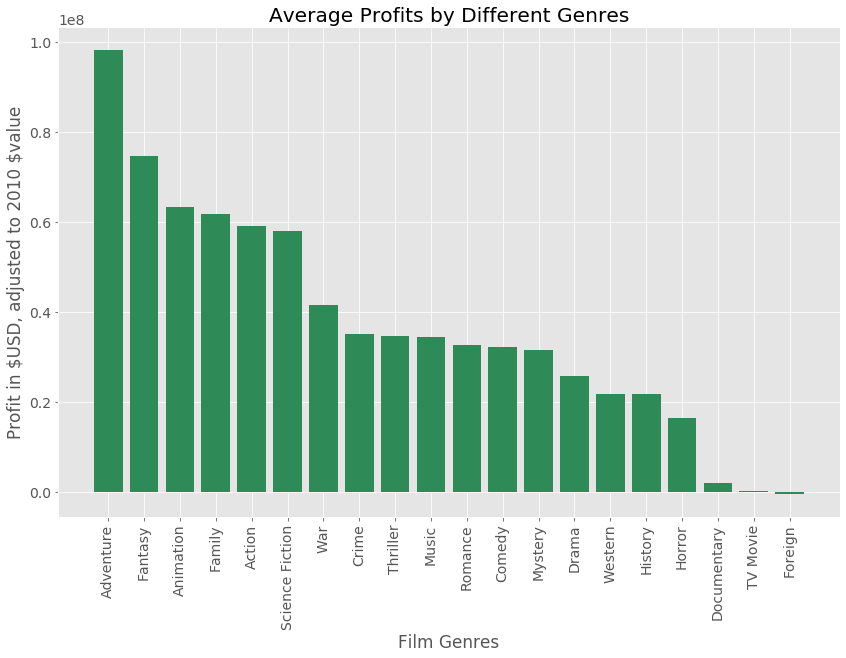

In [24]:
# Plot the bar chart

plt.figure(figsize=(14, 9))
plt.bar(df_temp.index, df_temp, color='seagreen')
plt.title('Average Profits by Different Genres')
plt.xlabel('Film Genres')
plt.ylabel('Profit in \$USD, adjusted to 2010 \$value')
plt.xticks(rotation='vertical');

**Analysis**

The bar chart shows clearly the relationship between film genres and the profit of the associated movie. One thing to notice is that in our original dataset, one video could belong to multiple genres. For instance, Titanic is both Romance and Drama. When we compute this value, we split the genres column. As such, one movie is often counted multiple times in different categories. We believe it is a rather fair calculation than handpicking one type for one movie as we do not want to lose information. 

Some interesting observations: most money-making films are Adventures, Fantasy and Animation, and the least profit-making genres include Documentary, TV movie, and Foreign. 

### Question 2: Does view's rating have corelation with the profit? 

In [25]:
# Investigate the relationship between view's rating with the profit of the film. 

df[['vote_average', 'profit_adj']].sort_values(by='vote_average', ascending=False)

,vote_average,profit_adj
3894,9.2,0.000000e+00
1200,8.8,0.000000e+00
6911,8.7,0.000000e+00
3690,8.5,0.000000e+00
8221,8.5,0.000000e+00
...,...,...
2373,2.1,0.000000e+00
7220,2.1,1.051621e+07
4882,2.0,0.000000e+00
7772,1.5,0.000000e+00


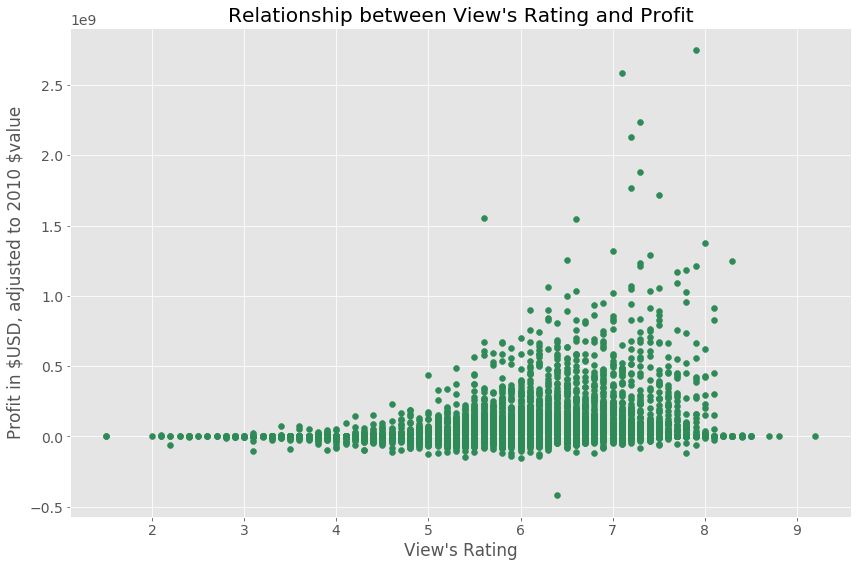

In [26]:
plt.figure(figsize=(14, 9))
plt.scatter(df['vote_average'], df['profit_adj'], color='seagreen')
plt.title("Relationship between View's Rating and Profit")
plt.xlabel("View's Rating")
plt.ylabel('Profit in \$USD, adjusted to 2010 \$value');

In [27]:
## calculate the correlation coefficient 
np.corrcoef(df['vote_average'], df['profit_adj'])

array([[1.        , 0.20313822],
       [0.20313822, 1.        ]])

**Analysis**

As we can see from the above scatter plots, the view's rating and the movie's profit is positively correlated. this showing that the view's rating is an essential factor to affect its final profit. That means, the better the view's raitng, the likelihood of earning more profit is higher. Correlation coefficient is then calculated at about 0.2, which is a substantial number in this business case. 

### Question 3: What is the typical runtime for the movies in our dataset?


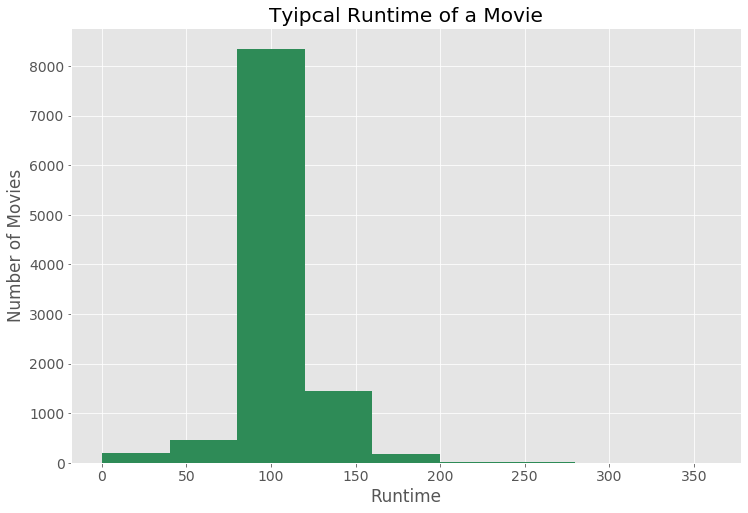

In [28]:
## set the bin size from 0 to 360 minutes. 
bins_list = [0, 40, 80, 120, 160, 200, 240, 280, 320, 360]

## plot the histogram showing the runtime counts
plt.figure(figsize=(12, 8))

plt.hist(df['runtime'], color = 'seagreen', bins = bins_list)
plt.title("Tyipcal Runtime of a Movie")
plt.xlabel("Runtime")
plt.ylabel('Number of Movies');


**Analysis**


As we can see from the histogram above, the majority of the movie's runtime falls into the 80 to 120 minutes. In some extreme cases, the film is above 200 minutes or shorter than 40 minutes. This observation aligns with most of the cases we encountered in our daily life. 

### Question 4: In general, how much does it cost to make a movie? 


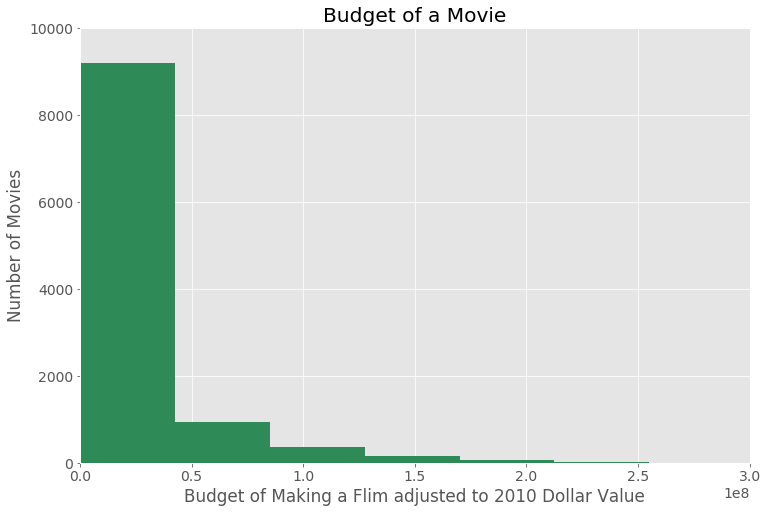

In [33]:
plt.figure(figsize=(12, 8))
plt.hist(df['budget_adj'], color = 'seagreen')

## adjust the range of the plot
plt.axis([0, 300000000, 0, 10000])  

plt.title("Budget of a Movie")
plt.xlabel("Budget of Making a Flim adjusted to 2010 Dollar Value")
plt.ylabel('Number of Movies');

**Analysis**

As we can see from the histogram above, the majority of the movie runs on the lower side of the budget, which is less than 4 million USD. In some extreme cases, a film could cost more than 25 million USD - a true blockbuster! In real life, we often feel there are more blockbusters each year, but according to the analysis, most movies are produced frugally, and only a few have the budget to splatter. 

### Question 5: Which year released most movie in our data set? 

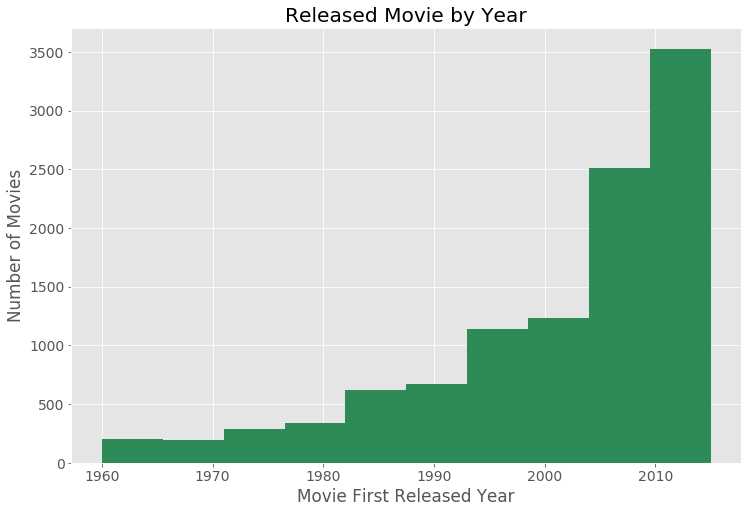

In [30]:
plt.figure(figsize=(12, 8))
plt.hist(df['release_year'], color = 'seagreen')

plt.title("Released Movie by Year")
plt.xlabel("Movie First Released Year")
plt.ylabel('Number of Movies');

**Analysis**

The movie industry is rapidly developing. We can conclude from the above graph that the number of the newly released movie is increasing from the 1960s till now. It also reconfirmed the need to adjust the dollar value to 2010 for a fair comparison, as some oldest film in our data set could trace back to 50 years ago. Nearly 3500 movies are produced after 2010, while in comparison, less than 1000 is produced from 1960s to 1970s. 

<a id='conclusions'></a>
## Conclusions

> The movie industry is rapidly growing since the 1960s. One of the direct evidence is the newly released film, which shows substantial growth, especially in recent years. Most movie runtime is from 80 minutes to 120 minutes, aligning with most movies we encountered in real-life scenarios. 

> There is another myth that making a movie could be costly. However, as shown in one of the graphs above, the majority of the film is budgeted less than 4 million dollars(adjusted to 2010 dollar value), and only a few are blockbuster level production. 

> It is clear that certain genres of film yield more profits than others. As we can see from the bar chart, the most popular genre is Adventure movie at nearly a total of 100 million USD in 2010 dollar value. It then followed by Fantasy and Animation movies. The least money-movie type is Foreign; it loses a small amount by showing the negative value. It might be due to the smaller audience market. 

> Also, the view's rating is also an essential factor to affect its final profit. As we calculated in the second part, the correlation coefficient is about 0.2, which is a substantial number in this business case. That means the voter's rating attribute approximately 20% of the final profit of this movie. Word-of-mouth counts! 


> We also are aware of the limitation of our analysis. We have to be clear that this analysis not reflecting the full picture of the original data set as we cleaned and filtered multiple rows in the data cleaning process. For example, we filtered all duplicated rows and the rows where it contains null values. It shrinks down the size of our data set for analyzing higher quality data. 

> Another limitation we need to be aware of is how we handle multiple values in the genres column. In the original data set, one film could belong to various genres, like Romantic/Drama/Comedy, as sometimes it is hard only to assign one specfic type to the movie. We split one movie genres column so that one film could be counted multiple times in different genres. It is not the perfect solution to show the types of the data set. However, it could genuinely reflect all information associated with the genre, without losing some key factors.  

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [34]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0